<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/9/96/Pytorch_logo.png/800px-Pytorch_logo.png" alt="alt text" width="400" height="100">


<h2>Introduction</h2>
Pytorch, a powerful and widely used Deep Learning framework that creating larger and more complicated networks, use complicated loss functions, and train with more complicated training regimes, etc.

<h3> Installing PyTorch and importing the required libraries </h3>
PyTorch need to be installed from the official website (https://pytorch.org/get-started/locally/)<br>
Pytorch has two main modules, torch and torchvision<br>
torch contains most of the Deep Learning functionalities while torchvision contains many computer vision functions designed to work in hand with torch

In [ ]:
# ! pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu117

In [1]:
import torch
import torchvision
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

<h3> The Pytorch Tensor </h3>

In [3]:
# Create some "Matrices" as lists of lists
w = [[1, 1, 1],
     [1.5, 1.5, 1.5],
     [2, 2, 2]]

x = [[6], [7], [8]]
b = [[1], [1], [1]]

In [4]:
# Transform the list of lists into a "numpy array" by using the function "array"
w_np = np.array(w)
x_np = np.array(x)

# Use the function "ones" to create an array of ones
b_np = np.ones((3, 1))

# Compute Wx + b using these numpy variables
output = np.matmul(w_np, x_np) + b_np

# Print out the result
print("Output:\n", output)
print("Output shape:\n", output.shape)

Output:
 [[22. ]
 [32.5]
 [43. ]]
Output shape:
 (3, 1)


Now in Pytorch, transforming the list of lists into a "torch tensor" by using the function "FloatTensor"

In [5]:
w_torch = torch.FloatTensor(w)

x_torch = torch.FloatTensor(x)
# Use the function "ones" to create an array of ones
b_torch = torch.ones(3, 1)

# Compute Wx + b using these numpy variables
output = torch.matmul(w_torch, x_torch) + b_torch

print("Output:\n", output)
print("Output shape:\n", output.shape)

Output:
 tensor([[22.0000],
        [32.5000],
        [43.0000]])
Output shape:
 torch.Size([3, 1])


Numpy and Pytorch are remarkably similar, and there are even functions that can transfer Pytorch tensors to Numpy arrays and back

In [6]:
# Create a random Numpy array
np_array = np.random.random((3, 4))
print("Numpy array:\n", np_array)

# Convert to Pytorch tensor
torch_tensor = torch.FloatTensor(np_array)
print("Pytorch tensor:\n", torch_tensor)

# Convert back to a Numpy array
np_array2 = torch_tensor.numpy()
print("Numpy array:\n", np_array2)

Numpy array:
 [[0.50726831 0.75817447 0.81925043 0.48644278]
 [0.68392451 0.39868146 0.17474019 0.99132007]
 [0.17592203 0.36129822 0.66274512 0.84310725]]
Pytorch tensor:
 tensor([[0.5073, 0.7582, 0.8193, 0.4864],
        [0.6839, 0.3987, 0.1747, 0.9913],
        [0.1759, 0.3613, 0.6627, 0.8431]])
Numpy array:
 [[0.5072683  0.7581745  0.8192504  0.48644277]
 [0.6839245  0.39868146 0.1747402  0.9913201 ]
 [0.17592204 0.36129823 0.6627451  0.8431072 ]]


<h3> Basic Element-wise Operations </h3>

In [7]:
# Create a 2D Tensor using torch.rand
y = torch.rand(4, 5)
print("The oringinal tensor:\n",y)

# Perform normal python scalar arithmetic on Torch tensors
print("\nScalar multiplication:\n", y*10)
print("Addition and square:\n", (y+1)**2)
print("Addition:\n", y+y)
print("Addition and division:\n", y/(y + 1))

# Use a combination of Torch functions and normal python arithmetic
print("\nPower and square root:\n", torch.sqrt(y**2))

# Torch tensors are objects and have functions
print("\nMin:%.2f\nMax:%.2f\nStandard deviation:%.2f\nSum:%.2f" %(y.min(), y.max(), y.std(), y.sum()))

The oringinal tensor:
 tensor([[0.2602, 0.2542, 0.7368, 0.9799, 0.3699],
        [0.7593, 0.2295, 0.6596, 0.3522, 0.6600],
        [0.5400, 0.6344, 0.4315, 0.0695, 0.1102],
        [0.1954, 0.3424, 0.8650, 0.9411, 0.7502]])

Scalar multiplication:
 tensor([[2.6018, 2.5418, 7.3684, 9.7988, 3.6994],
        [7.5928, 2.2949, 6.5956, 3.5216, 6.5997],
        [5.4003, 6.3437, 4.3155, 0.6947, 1.1019],
        [1.9542, 3.4243, 8.6501, 9.4106, 7.5019]])
Addition and square:
 tensor([[1.5880, 1.5730, 3.0166, 3.9199, 1.8767],
        [3.0951, 1.5116, 2.7541, 1.8283, 2.7555],
        [2.3717, 2.6712, 2.0493, 1.1438, 1.2325],
        [1.4290, 1.8021, 3.4783, 3.7677, 3.0632]])
Addition:
 tensor([[0.5204, 0.5084, 1.4737, 1.9598, 0.7399],
        [1.5186, 0.4590, 1.3191, 0.7043, 1.3199],
        [1.0801, 1.2687, 0.8631, 0.1389, 0.2204],
        [0.3908, 0.6849, 1.7300, 1.8821, 1.5004]])
Addition and division:
 tensor([[0.2065, 0.2027, 0.4242, 0.4949, 0.2700],
        [0.4316, 0.1867, 0.3974, 0.2604, 

<h3>Tensor Opperations</h3>

In [8]:
# Create two 3D Tensors
tensor_1 = torch.rand(3, 3, 3)
tensor_2 = torch.rand(3, 3, 3)

# Add the 2 Tensors
print("Addition:\n", tensor_1+tensor_2)

# We cannot perform a normal "matrix" multiplication on a 3D tensor
# But we can treat the 3D tensor as a "batch" (like a stack) of 2D tensors
# And perform normal matrix multiplication independently on each pair of 2D matrices
print("\nBatch Multiplication:\n", torch.bmm(tensor_1, tensor_2))

Addition:
 tensor([[[1.1077, 1.4774, 0.5305],
         [1.2195, 1.4021, 1.1418],
         [0.7098, 0.9079, 1.5354]],

        [[1.5972, 0.7755, 1.2750],
         [0.9500, 1.2623, 1.0601],
         [1.4086, 0.8248, 1.0432]],

        [[1.1205, 1.2060, 1.5583],
         [0.9777, 0.7762, 0.7566],
         [0.6267, 1.3498, 0.6968]]])

Batch Multiplication:
 tensor([[[0.7643, 1.5121, 0.9931],
         [0.9454, 0.7860, 1.0318],
         [0.3981, 0.9811, 0.7757]],

        [[1.3612, 0.7657, 0.4163],
         [1.0978, 1.0125, 1.2125],
         [1.4332, 0.8557, 0.6515]],

        [[0.7404, 1.1143, 0.9978],
         [0.3236, 0.3798, 0.4506],
         [0.8146, 1.1103, 0.9867]]])


In [9]:
tensor_3 = torch.rand(2, 4, 5)
print("The origional Tensor is is:\n", tensor_3)
print("With shape:\n", tensor_3.shape)

# Swap the Tensor dimensions by tranpose
print("\nThe Re-arranged is:\n", tensor_3.transpose(0, 2))
print("With shape:\n", tensor_3.transpose(0, 2).shape)

The origional Tensor is is:
 tensor([[[0.3390, 0.2301, 0.1492, 0.7962, 0.6256],
         [0.0412, 0.0099, 0.3430, 0.6389, 0.4345],
         [0.6668, 0.6540, 0.4750, 0.8744, 0.5021],
         [0.3571, 0.2348, 0.6210, 0.6961, 0.2550]],

        [[0.6743, 0.8159, 0.6179, 0.9263, 0.5587],
         [0.2446, 0.2370, 0.1601, 0.9192, 0.6771],
         [0.0087, 0.4754, 0.7796, 0.7738, 0.4676],
         [0.3223, 0.3283, 0.3525, 0.4822, 0.9566]]])
With shape:
 torch.Size([2, 4, 5])

The Re-arranged is:
 tensor([[[0.3390, 0.6743],
         [0.0412, 0.2446],
         [0.6668, 0.0087],
         [0.3571, 0.3223]],

        [[0.2301, 0.8159],
         [0.0099, 0.2370],
         [0.6540, 0.4754],
         [0.2348, 0.3283]],

        [[0.1492, 0.6179],
         [0.3430, 0.1601],
         [0.4750, 0.7796],
         [0.6210, 0.3525]],

        [[0.7962, 0.9263],
         [0.6389, 0.9192],
         [0.8744, 0.7738],
         [0.6961, 0.4822]],

        [[0.6256, 0.5587],
         [0.4345, 0.6771],
        

<h3> Indexing </h3>
Indexing in Pytorch works the same as it does in Numpy

In [10]:
# Create a 4D Tensor
tensor = torch.rand(2, 3, 1, 4)
print("Our Tensor:\n", tensor)

# Select the last element of dim0
print("\nThe last element of dim0:\n", tensor[-1])

# 1st element of dim0
# 2nd element of dim1
print("\nIndexed elements:\n", tensor[0, 1])

# Select all elements of dim0
# The 2nd element of dim1
# The 1st element of dim2
# The 3rd element of dim3
print("\nIndexed elements:\n", tensor[:, 1, 0, 2])

Our Tensor:
 tensor([[[[0.8290, 0.7727, 0.4859, 0.5289]],

         [[0.6913, 0.5385, 0.0824, 0.4735]],

         [[0.5547, 0.1893, 0.6570, 0.8332]]],


        [[[0.2484, 0.1829, 0.8193, 0.6761]],

         [[0.7682, 0.1740, 0.0190, 0.4327]],

         [[0.3033, 0.6516, 0.0203, 0.9316]]]])

The last element of dim0:
 tensor([[[0.2484, 0.1829, 0.8193, 0.6761]],

        [[0.7682, 0.1740, 0.0190, 0.4327]],

        [[0.3033, 0.6516, 0.0203, 0.9316]]])

Indexed elements:
 tensor([[0.6913, 0.5385, 0.0824, 0.4735]])

Indexed elements:
 tensor([0.0824, 0.0190])


<h3> Describing Tensors </h3>

In [11]:
# Create a large 4D Tensor
tensor = torch.rand(3, 5, 3, 2)

# View the Number of elements in every dimension
print("The Tensor's shape is:", tensor.shape)

# In Pytorch shape and size() do the same thing
print("The Tensor's shape using size() is:", tensor.size())

# View the number of elements in total
print("There are %d elements in total:" % tensor.numel())

# View the number of Dimensions
print("There are %d Dimensions" % (tensor.ndim))

The Tensor's shape is: torch.Size([3, 5, 3, 2])
The Tensor's shape using size() is: torch.Size([3, 5, 3, 2])
There are 90 elements in total:
There are 4 Dimensions


<h3> Reshaping </h3>

In [13]:
# Reshape the Tensor to a 2D Tensor
print("Reshape to 3x30:\n", tensor.reshape(3, 30))

# Use the Flatten method to convert to a 1D Tensor
print("\nFlatten to a 1D Tensor:\n",tensor.flatten())

Reshape to 3x30:
 tensor([[0.4418, 0.1728, 0.4809, 0.2310, 0.4004, 0.9807, 0.2963, 0.9808, 0.0040,
         0.0671, 0.8909, 0.4866, 0.6554, 0.1466, 0.9905, 0.5762, 0.9544, 0.2876,
         0.6727, 0.6639, 0.8368, 0.7893, 0.3148, 0.5573, 0.6575, 0.4580, 0.2961,
         0.0293, 0.7323, 0.5458],
        [0.0449, 0.2078, 0.4969, 0.5371, 0.0755, 0.8115, 0.4807, 0.6119, 0.9637,
         0.0626, 0.8422, 0.3738, 0.3717, 0.2841, 0.1221, 0.3582, 0.5207, 0.4166,
         0.8806, 0.2615, 0.9684, 0.3605, 0.4316, 0.5070, 0.8564, 0.2263, 0.3358,
         0.7604, 0.2087, 0.5620],
        [0.5030, 0.1664, 0.6614, 0.2328, 0.9897, 0.9031, 0.4806, 0.5212, 0.9260,
         0.4211, 0.8522, 0.3587, 0.0437, 0.7436, 0.6936, 0.2591, 0.0360, 0.0269,
         0.0458, 0.1474, 0.3088, 0.6755, 0.7962, 0.6722, 0.4133, 0.9316, 0.0931,
         0.6620, 0.8740, 0.3729]])

Flatten to a 1D Tensor:
 tensor([0.4418, 0.1728, 0.4809, 0.2310, 0.4004, 0.9807, 0.2963, 0.9808, 0.0040,
        0.0671, 0.8909, 0.4866, 0.6554, 0.14

<h4>Squeezing and Unsqueezing </h4>
A very common shape-changing operation is to add an "empty" dimension to ensure the shape (specifically the number of dimensions) of the tensor is correct for certain functions. <br>

In [14]:
# Create a 2D Tensor
tensor = torch.rand(3, 2)

# View the Number of elements in every dimension
print("The Tensors shape is:", tensor.shape)

# Unsqueeze adds an "empty" dimension to our Tensor
print("Add an empty dimenson to dim3:", tensor.unsqueeze(2).shape)

# Unsqueeze adds an "empty" dimension to our Tensor
print("Add an empty dimenson to dim2:", tensor.unsqueeze(1).shape)

The Tensors shape is: torch.Size([3, 2])
Add an empty dimenson to dim3: torch.Size([3, 2, 1])
Add an empty dimenson to dim2: torch.Size([3, 1, 2])


In [15]:
# Create a 4D Tensor with a few "empty" dimensions
tensor = torch.rand(1, 3, 1, 2)

# View the Number of elements in every dimension
print("The Tensor's shape is:", tensor.shape)

# Squeeze removes an "empty" dimension from our Tensor
print("Remove empty dimenson dim3:", tensor.squeeze(2).shape)

# Squeeze removes an "empty" dimension from our Tensor
print("Remove empty dimenson dim0:", tensor.squeeze(0).shape)

# If specify a dimension, squeeze will remove ALL empty dimensions
print("Remove all empty dimensons:", tensor.squeeze().shape)

The Tensor's shape is: torch.Size([1, 3, 1, 2])
Remove empty dimenson dim3: torch.Size([1, 3, 2])
Remove empty dimenson dim0: torch.Size([3, 1, 2])
Remove all empty dimensons: torch.Size([3, 2])


<h2> Broadcasting </h2>

In [16]:
# Create 2 differently shaped 4D Tensors (Matrices)
tensor1 = torch.rand(1, 4, 3, 1)
tensor2 = torch.rand(3, 4, 1, 4)

print("Tensor 1 shape:\n", tensor1.shape)
print("\nTensor 2 shape:\n", tensor2.shape)

tensor3 = tensor1 + tensor2

print("\nThe resulting shape is:\n", tensor3.shape)

Tensor 1 shape:
 torch.Size([1, 4, 3, 1])

Tensor 2 shape:
 torch.Size([3, 4, 1, 4])

The resulting shape is:
 torch.Size([3, 4, 3, 4])


<h2> Creating a basic Classifier </h2>

In [17]:
num_data_points = 1000

# Define the mean and covariance for two random data distributions
class_1_cov = torch.FloatTensor([[1.3, 0.25], [0.25, 1.4]])
class_1_mu = torch.FloatTensor([[1, 2]])
class_1_data = torch.randn(num_data_points, 2)
class_1_data = torch.mm(class_1_data, class_1_cov) + class_1_mu
class_1_data = torch.cat((class_1_data, torch.ones(num_data_points, 1)), 1)

class_2_cov = torch.FloatTensor([[2, -0.5], [-0.5, 1]])
class_2_mu = torch.FloatTensor([[-2, -3]])
class_2_data = torch.randn(num_data_points, 2)
class_2_data = torch.mm(class_2_data, class_2_cov) + class_2_mu
class_2_data = torch.cat((class_2_data, torch.ones(num_data_points, 1)), 1)

# Create some binary labels for each class
class_1_labels = torch.zeros(num_data_points, 1)
class_2_labels = torch.ones(num_data_points, 1)

# Stack all the data and labels together
all_data = torch.cat((class_1_data, class_2_data), 0)
all_labels = torch.cat((class_1_labels, class_2_labels), 0)

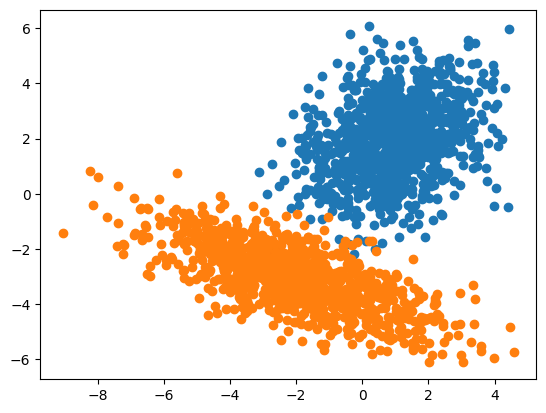

In [18]:
# Plot the two datasets
plt.scatter(class_1_data[:, 0], class_1_data[:, 1])
plt.scatter(class_2_data[:, 0], class_2_data[:, 1])

In [19]:
# Calculate the parameters (theta) and use it to make a prediction
theta = torch.matmul(torch.linalg.pinv(all_data), all_labels)
prediction = (torch.matmul(all_data, theta) >= 0.5).type(torch.long)

# Calculate the accuracy of the predictions
accuracy = (prediction == all_labels).sum()/len(prediction)
print("Classifier Accuracy is %.2f%%" % (100 * accuracy.item()))

print(theta.shape)

Classifier Accuracy is 98.70%
torch.Size([3, 1])
